In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
density_data = np.load('./data/dmfield_z0.npz')

density_data['z']

array(4.4408921e-16)

In [8]:
ncells = density_data['cells']

d = density_data['density'].flatten()

d = d / d.mean()
d = np.log( d[d > 0] )


In [9]:
boxsize  = density_data['boxsize']

cellsize = boxsize / ncells
cellsize

1.5625

In [10]:
kn = np.pi / cellsize
kn

2.0106192982974678

In [11]:
from scipy import stats

shape, loc, scale = stats.genextreme.fit(d)

shape, loc, scale

(0.06373458926939274, -1.7886165422027367, 1.062712810945781)

In [12]:

from cosmogev import Cosmology, Genextreme

cm = Cosmology(0.73, 0.25, 0.045, 1.0, 0.9, ).normalizePower()

gev = Genextreme(cellsize, cm).parametrize(0)
# gev.param = (-0.069, -1.742, 1.06)
gev.param

(-0.0693898447999965, -1.5423676120427754, 0.5728289822085321)

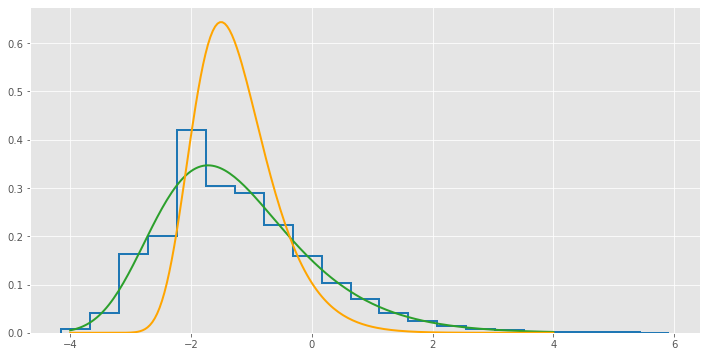

In [13]:
plt.figure(figsize = [12, 6])

plt.hist( d, bins = 21, histtype = 'step', density = True, lw = 2, color = 'tab:blue' )

x = np.linspace(-4, 4, 201)
plt.plot(
            x, stats.genextreme.pdf( x, shape, loc, scale ),
            '-', color = 'tab:green', lw = 2
        )

plt.plot(
            x, gev.pdf( x ),
            '-', color = 'orange', lw = 2
        )

plt.show()